In [113]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import itertools

In [114]:
movies = pd.read_csv('imdb (1000 movies) in june 2022.csv')
tv_series = pd.read_csv('imdb (1000 tv series) - (june 2022).csv')
games = pd.read_csv('imdb(VIDEO GAMES).csv')

In [115]:
movies.head(2)

,ranking of movie\r\n,movie name\r\n,Year,certificate,runtime,genre,RATING,metascore,DETAIL ABOUT MOVIE\n,DIRECTOR\r\n,ACTOR 1\n,ACTOR 2\n,ACTOR 3,ACTOR 4,votes,GROSS COLLECTION\r\n
0,1,The Shawshank Redemption,-1994,15,142 min,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,"2,603,314",$28.34M
1,2,The Godfather,-1972,X,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"1,798,731",$134.97M


In [116]:
movies.shape

(1000, 16)

In [117]:
tv_series.head(2)

,ranking,series name\r,Year,certificate,runtime,genre,rating,DETAILS,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,VOTES
0,1,Bluey,(2018– ),U,7 min,"Animation, Family",9.7,The slice-of-life adventures of an Australian ...,David McCormack,Melanie Zanetti,Brad Elliott,Dan Brumm,"7,114"
1,2,Breaking Bad,(2008–2013),15,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,"1,756,075"


In [118]:
tv_series.shape

(1000, 13)

In [119]:
games.head(2)

,RANKING,VIDEO GAME NAME,Year,genre,Rating,DETAILS,DIRECTOR,ACTOR-1,ACTOR-2,ACTOR-3,ACTOR-4,VOTES,certificate
0,1,The Witcher 3: Wild Hunt - Blood and Wine,(2016 Video Game),"Action, Adventure, Drama",9.8,Geralt is in the southern province of Toussain...,Konrad Tomaszkiewicz,Doug Cockle,MyAnna Buring,Antonia Bernath,Mark Noble,6942,NaN
1,2,Red Dead Redemption II,(2018 Video Game),"Action, Adventure, Crime",9.7,Amidst the decline of the Wild West at the tur...,Benjamin Byron Davis,Roger Clark,Rob Wiethoff,Cali Elizabeth Moore,NaN,29498,M


In [120]:
games.shape

(250, 13)

In [121]:
print(movies.columns)
print(tv_series.columns)
print(games.columns)

Index(['ranking of movie\r\n', 'movie name\r\n', 'Year', 'certificate',
       'runtime', 'genre', 'RATING', 'metascore', 'DETAIL ABOUT MOVIE\n',
       'DIRECTOR\r\n', 'ACTOR 1\n', 'ACTOR 2\n', 'ACTOR 3', 'ACTOR 4', 'votes',
       'GROSS COLLECTION\r\n'],
      dtype='object')
Index(['ranking', 'series name\r', 'Year', 'certificate', 'runtime', 'genre',
       'rating', 'DETAILS', 'ACTOR 1', 'ACTOR 2', 'ACTOR 3', 'ACTOR 4',
       'VOTES'],
      dtype='object')
Index(['RANKING ', 'VIDEO GAME NAME ', 'Year', 'genre', 'Rating', 'DETAILS',
       'DIRECTOR ', 'ACTOR-1', 'ACTOR-2', 'ACTOR-3', 'ACTOR-4', 'VOTES ',
       'certificate'],
      dtype='object')


In [122]:
movie_concat = movies[['movie name\r\n', 'genre', 'DETAIL ABOUT MOVIE\n']]\
    .rename(columns={'movie name\r\n':'title', 'DETAIL ABOUT MOVIE\n':'summary'})
tv_concat = tv_series[['series name\r', 'genre', 'DETAILS']]\
    .rename(columns={'series name\r':'title', 'DETAILS':'summary'})
game_concat = games[['VIDEO GAME NAME ', 'genre', 'DETAILS']]\
    .rename(columns={'VIDEO GAME NAME ':'title', 'DETAILS':'summary'})

frames = [movie_concat, tv_concat, game_concat]

df_combined = pd.concat(frames, ignore_index=True)

df_combined.head()

,title,genre,summary
0,The Shawshank Redemption,Drama,Two imprisoned men bond over a number of years...
1,The Godfather,"Crime, Drama",The aging patriarch of an organized crime dyna...
2,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,"Biography, Drama, History","In German-occupied Poland during World War II,..."


In [123]:
df_combined.shape

(2250, 3)

In [124]:
df_combined.isna().any().sum()

2

In [125]:
df_combined.dropna(axis='rows', inplace=True)

In [126]:
df_combined.isna().any().sum()

0

In [127]:
df_combined['genre'] = df_combined['genre'].apply(lambda x: x.split(', '))

df_combined.head(2)

,title,genre,summary
0,The Shawshank Redemption,[Drama],Two imprisoned men bond over a number of years...
1,The Godfather,"[Crime, Drama]",The aging patriarch of an organized crime dyna...


In [128]:
genres = df_combined['genre'].explode().unique()
genres.sort()
genres

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western'], dtype=object)

In [129]:
genre_counts = df_combined['genre'].explode().value_counts()
genre_counts.sort_index(inplace=True)
genre_counts

Action          620
Adventure       563
Animation       276
Biography       127
Comedy          711
Crime           459
Documentary      36
Drama          1323
Family          104
Fantasy         201
Film-Noir        22
Game-Show        12
History          93
Horror           90
Music            55
Musical          20
Mystery         238
News              5
Reality-TV       15
Romance         210
Sci-Fi          148
Short            13
Sport            37
Talk-Show        20
Thriller        212
War              58
Western          25
Name: genre, dtype: int64

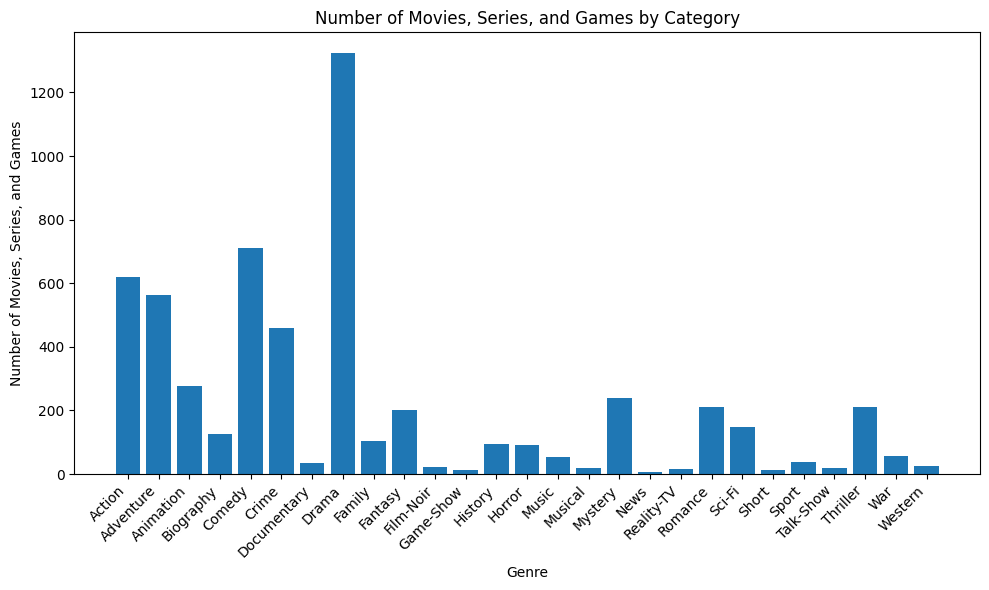

In [130]:
plt.figure(figsize=(10,6))
plt.bar(genre_counts.index, genre_counts)
plt.title('Number of Movies, Series, and Games by Category')
plt.xlabel('Genre')
plt.ylabel('Number of Movies, Series, and Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Encode Genres

In [131]:
total = 0
for i in range(len(df_combined)):
    if df_combined['genre'].iloc[i] == []:
        total += 1

total

0

In [132]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [133]:
genres_encoded = pd.DataFrame(mlb.fit_transform(df_combined['genre']), columns=mlb.classes_)

df_encoded = pd.concat([df_combined.reset_index(drop=True), genres_encoded.reset_index(drop=True)],
                       axis=1, ignore_index=True)

df_encoded.columns = df_combined.columns.to_list() + genres_encoded.columns.to_list()

df_encoded.head(2)

,title,genre,summary,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,The Shawshank Redemption,[Drama],Two imprisoned men bond over a number of years...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,"[Crime, Drama]",The aging patriarch of an organized crime dyna...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
df_encoded.head(2)

,title,genre,summary,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,The Shawshank Redemption,[Drama],Two imprisoned men bond over a number of years...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Godfather,"[Crime, Drama]",The aging patriarch of an organized crime dyna...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
df_encoded.isna().any().sum()

0

## Vectorize summaries

In [136]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [137]:
stopwords = nltk.corpus.stopwords.words('english')

In [138]:
def clean_text(text):
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [139]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
genre_tfidf = tfidf_vect.fit_transform(df_combined['genre'])

genre_vectorized = pd.DataFrame(genre_tfidf.toarray())
genre_vectorized.head()

,0,1,2,3,4,5,6,7,8,9,...,307,308,309,310,311,312,313,314,315,316
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
genre_vectorized.shape

(2241, 317)

## Set Up Neural Network

In [141]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [142]:
X = genre_vectorized
y = df_encoded.drop(columns=['title', 'summary', 'genre'])

In [143]:
X.shape

(2241, 317)

In [144]:
y.shape

(2241, 27)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [146]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [147]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.lin_input = nn.Linear(input_size, 128)
        self.hidden1 = nn.Linear(128, 64)
        self.lin_output = nn.Linear(64, output_size)

    def forward(self, x):
        x = F.relu(self.lin_input(x))
        x = F.relu(self.hidden1(x))
        x = self.lin_output(x)
        return x

In [148]:
criterion = nn.CrossEntropyLoss()

model = Net(X_train_tensor.size()[1], y_train_tensor.size()[1])

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

Net(
  (lin_input): Linear(in_features=317, out_features=128, bias=True)
  (hidden1): Linear(in_features=128, out_features=64, bias=True)
  (lin_output): Linear(in_features=64, out_features=27, bias=True)
)


## Training Loop

In [149]:
print('epoch'.ljust(6) + 
      '| loss'
      '\n------|-------------')

for epoch in range(1000):
    outputs = model(X_train_tensor)

    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % int(1000/10) == 0:
        print(f'{epoch+1}'.ljust(6) + 
              f'|   {loss:.4f}'.ljust(14))

epoch | loss
------|-------------


100   |   2.4933    
200   |   2.4804    
300   |   2.4799    
400   |   2.4827    
500   |   2.4991    
600   |   2.4902    
700   |   2.4882    
800   |   2.4799    
900   |   2.4794    
1000  |   2.4793    
